In [1]:
input_dim = 5
model_file = "Model/model.cpkt"
num_clusters = 2

import json
import matplotlib.pyplot as plt
from matplotlib.path import Path
import numpy as np
import os
import pickle
import tensorflow as tf

import sys
sys.path.insert(0, "../Code/")
from base import load_encoder
from explain_sync import explain, apply

def load_model(input_dim = input_dim, model_file = model_file):
    return load_encoder(input_dim, model_file)


In [2]:
###
# Load Data & Configuration
###

x = pickle.load(open("data.pkl", "rb"))

with open("vertices.json") as json_file:  
    all_vertices = json.load(json_file)


INFO:tensorflow:Restoring parameters from Model/model.cpkt


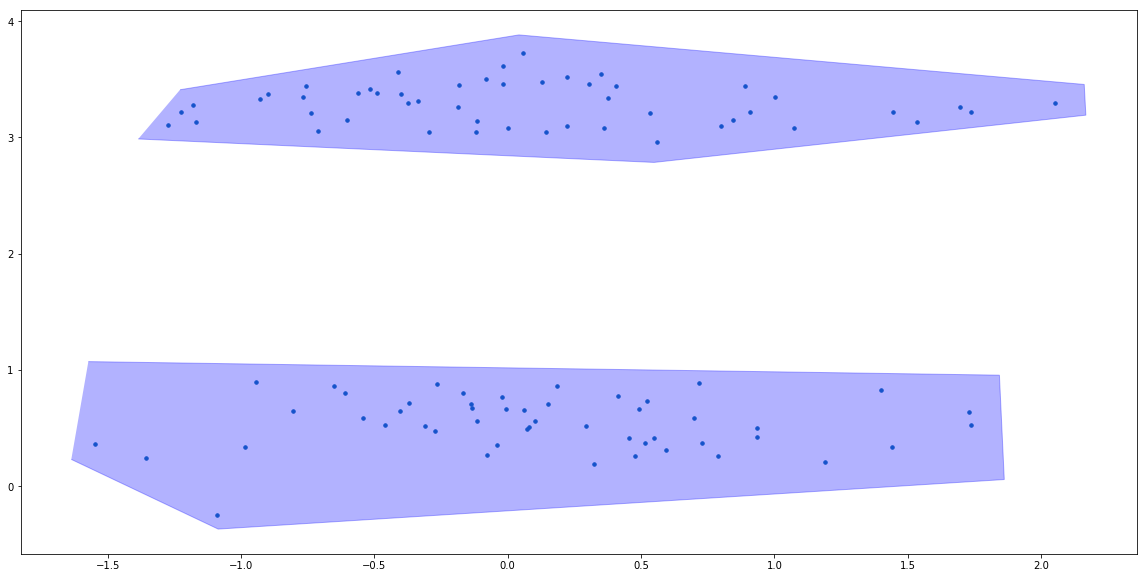

In [3]:
###
# Visualize the data and the marked clusters
###

sess, rep, X, D = load_model()

data_rep = sess.run(rep, feed_dict={X: x, D: np.zeros((1, input_dim))})

fig, ax = plt.subplots(figsize=(20, 10))
patches = []

for i in range(num_clusters):
    line = plt.Polygon(all_vertices[i], closed=False, color="blue", alpha=0.3)
    ax.add_line(line)

plt.scatter(data_rep[:, 0], data_rep[:, 1], s = 12)

plt.show()
plt.close()

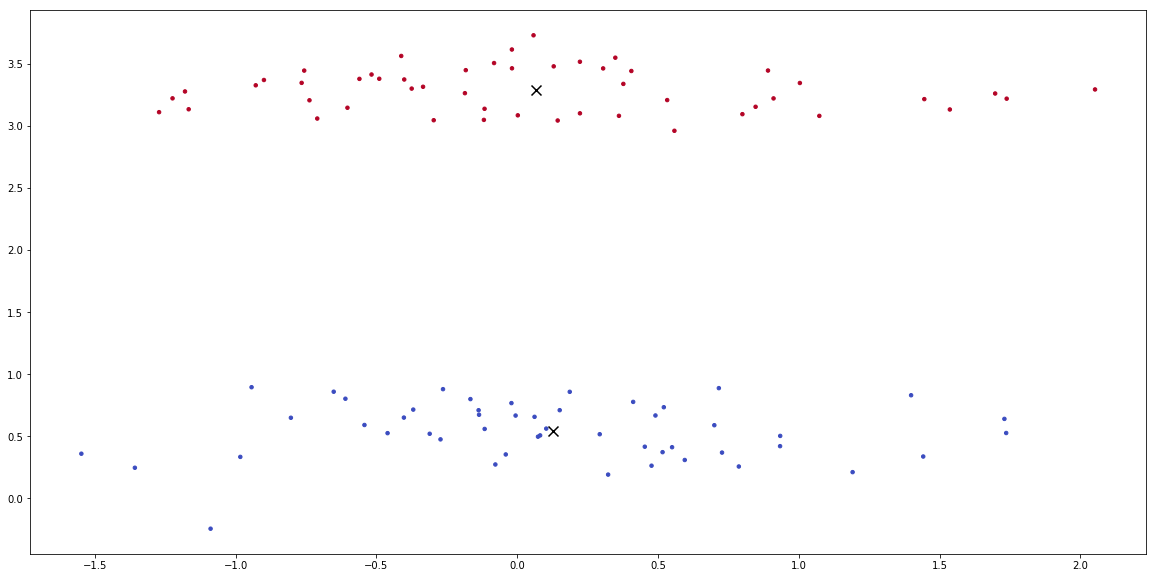

In [4]:
###
# Find the datapoints in each marked cluster
###

m = data_rep.shape[0]
cluster = -1.0 * np.ones((m))
indices = [[]] * num_clusters
centers = [[]] * num_clusters
for i in range(num_clusters):
    path = Path(all_vertices[i])
    indices[i] = []
    for j in range(m):
        if path.contains_points(data_rep[j].reshape((1,2))):
            cluster[j] = i
            indices[i].append(j)
    centers[i] = np.mean(data_rep[indices[i], :], axis = 0)
    
centers = np.array(centers)

fig, ax = plt.subplots(figsize=(20, 10))
patches = []
    
plt.scatter(data_rep[:, 0], data_rep[:, 1], s = 12, c = cluster, cmap = plt.cm.coolwarm)
plt.scatter(centers[:, 0], centers[:, 1], c = "black", marker = "x", s = 100)

plt.show()
plt.close()   

In [5]:
###
# Compute the cluster explanations
###

os.system("rm -rf explanation")
deltas, score = explain(load_model, x, data_rep, indices, dispersion = 0.0, lambda_global = 0.5, num_points = 10, learning_rate = 0.01)    


INFO:tensorflow:Restoring parameters from Model/model.cpkt
0 10.543608
1 10.247287845611572
2 10.068136110305787
3 9.761566592216493
4 9.703674798870088
5 9.590041117963793
8 9.526128184720031
9 9.483216999701398
12 9.184299622332489
14 8.948359251248739
15 8.631551957334192
17 8.497119285986962
20 8.285645034710326
22 8.059591548549935
25 7.951459765519489
26 7.589238965588025
27 7.477442697355638
28 7.385278137626788
30 7.144047733150977
32 7.075754801395017
33 6.925685501065085
34 6.685938730209675
35 6.525690461131579
37 6.445269226824685
38 6.413625442798833
39 6.264259472920805
40 6.176251913995423
41 5.993073105118464
47 5.9623568513480265
49 5.716301103768232
50 5.565750199858083
51 5.478011725816489
52 5.253766666477943
60 5.182008198024683
62 5.172191097148955
63 5.1561589304882585
64 5.079388862634746
65 4.950535970138056
66 4.757077202683576
77 4.743067935882316
78 4.556117065946733
79 4.522044427574106
80 4.455431706351424
81 4.4542995273849835
84 4.435618772711425
85 4.40


From  0  to  1 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


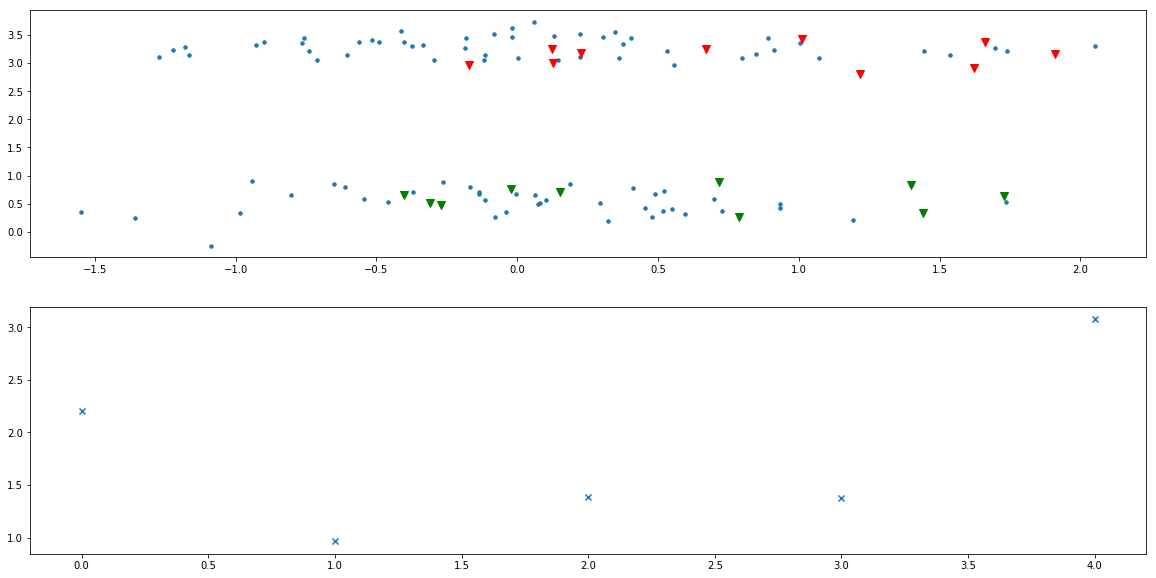


From  1  to  0 

INFO:tensorflow:Restoring parameters from Model/model.cpkt


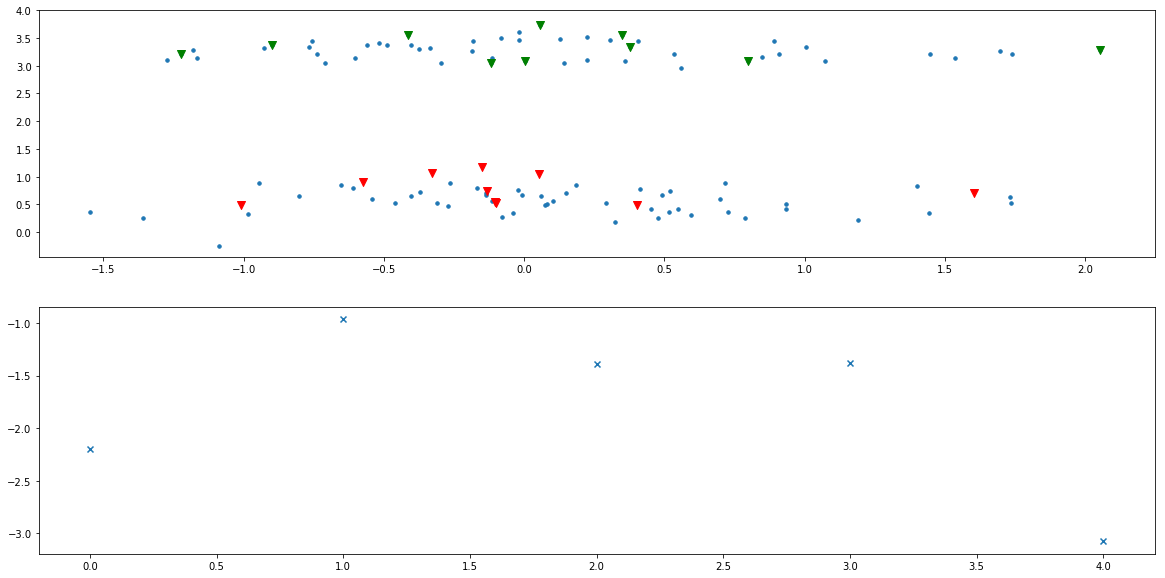

In [6]:
###
# Visualize the cluster explanations
###

def myplot(c1, c2):
    print("\nFrom ", c1, " to ", c2, "\n")
    
    if c1 == 0:
        d = deltas[c2 - 1]
    elif c2 == 0:
        d = -1.0 * deltas[c1 - 1]
    else:
        d = -1.0 * deltas[c1 - 1] + deltas[c2 - 1]
        
    apply(load_model, x, data_rep, indices, c1, np.reshape(d, (1, input_dim)), num_points = 10)
    
myplot(0, 1)
myplot(1, 0)
